In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sparse_rf.algs.core import min_wl2, min_l2
from sparse_rf.modules import make_X, make_W, make_A
from sparse_rf.util import *
from sparse_rf.util.fns import *

In [2]:
m = 1000
d = 100
q = 2
active = fourier

ratio_train = 0.7

def make_D(W):
    norm = np.linalg.norm(W, axis=1)**2
    weight = np.concatenate((norm, norm), axis=-1)
    D = np.diag(1.0/weight**4)
    return D

In [3]:
X = make_X(d, m, dist=uniform)
X_train = X[:int(m*ratio_train), :]
X_test = X[int(m*ratio_train):, :]

In [4]:
y = (1+np.linalg.norm(X, axis=-1))**(-0.5)
y_train = y[:int(m*ratio_train)]
y_test = y[int(m*ratio_train):]

In [5]:
Ns = np.arange(1, 10101, 100)

In [6]:
%%time
results_dense_l2 = []
for N in Ns:
    res = []
    for _ in range(5):
        W = make_W(d, d, N=N)
        A_train = make_A(X_train, W, active=active)
        A_test = make_A(X_test, W, active=active)
        c = min_l2(A_train, y_train)
        res.append(np.linalg.norm(A_test@c - y_test) / len(y_test))
    results_dense_l2.append(res)

CPU times: user 1h 43min 52s, sys: 1min 33s, total: 1h 45min 26s
Wall time: 18min 3s


In [7]:
%%time
results_sparse_l2 = []
for N in Ns:
    res = []
    for _ in range(5):
        W = make_W(d, q, N=N)
        A_train = make_A(X_train, W, active=active)
        A_test = make_A(X_test, W, active=active)
        c = min_l2(A_train, y_train)
        res.append(np.linalg.norm(A_test@c - y_test) / len(y_test))
    results_sparse_l2.append(res)

CPU times: user 1h 52min 31s, sys: 1min 38s, total: 1h 54min 10s
Wall time: 19min 19s


In [8]:
%%time
results_dense_wl2 = []
for N in Ns:
    res = []
    for _ in range(5):
        W = make_W(d, d, N=N)
        A_train = make_A(X_train, W, active=active)
        A_test = make_A(X_test, W, active=active)
        D = make_D(W)
        c = min_wl2(A_train, y_train, D)
        res.append(np.linalg.norm(A_test@c - y_test) / len(y_test))
    results_dense_wl2.append(res)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.53 µs


In [9]:
%%time
results_sparse_wl2 = []
for N in Ns:
    res = []
    for _ in range(5):
        W = make_W(d, q, N=N)
        A_train = make_A(X_train, W, active=active)
        A_test = make_A(X_test, W, active=active)
        D = make_D(W)
        c = min_wl2(A_train, y_train, D)
        res.append(np.linalg.norm(A_test@c - y_test) / len(y_test))
    results_sparse_wl2.append(res)

CPU times: user 25 µs, sys: 0 ns, total: 25 µs
Wall time: 26.9 µs


[0.022236447179273512, 0.02637134476898882, 0.033496275865984595, 0.05969177725035646, 0.06096336402892331, 0.03936193252185874, 0.03435911147819633, 0.03249514022469931, 0.030542318815223273, 0.02820564718160575, 0.028286569303502547, 0.02694472198790579, 0.026543621819400825, 0.026039929717404615, 0.025458588276019867, 0.025234350837551787, 0.025447351530243807, 0.024827839779722048, 0.024535095510939988, 0.024398416072643814, 0.024661917909547963, 0.024730716780219635, 0.024328795680607376, 0.024047598112530193, 0.02403016669433059, 0.02388241988371578, 0.024020460767890356, 0.02380753904723494, 0.023486911036547164, 0.023259423268379424, 0.02352176752601663, 0.02337285229432495, 0.023669458125984855, 0.023374859251748197, 0.023495663828279372, 0.02325520058686365, 0.02341993870209722, 0.023541013469801687, 0.0234764102728603, 0.023305648719302834, 0.023425241038765622, 0.022878494736091708, 0.0231166875095399, 0.023100091810454564, 0.02318156479739748, 0.02319627230937918, 0.023036

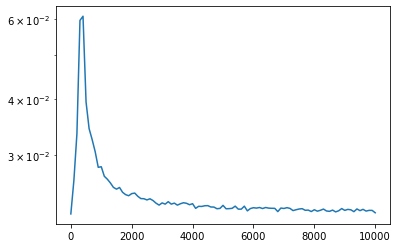

In [10]:
print([np.mean(res) for res in results_dense_l2])
plt.semilogy(Ns, [np.mean(res) for res in results_dense_l2])

[0.011252579812490206, 0.0003502408303758855, 0.00037043307396692745, 0.0004804969418809433, 0.000647570844682186, 0.0003785552960670797, 0.0003061498965618736, 0.00024275790612053412, 0.00022372343182012526, 0.00020400094416105449, 0.00018385967134449728, 0.00016659464279408944, 0.0001725452755840582, 0.00015340555744701646, 0.00014836251546772552, 0.00014049559611600929, 0.0001342334014579106, 0.0001368618219828588, 0.00013074078554871395, 0.00012289779665622115, 0.0001261557930972915, 0.00011876462422559346, 0.00011395883290053416, 0.00011508793010401059, 0.00010998599381134603, 0.00010925869989230448, 0.00010615764183309907, 0.0001017535043120008, 9.94766632924096e-05, 0.00010211913520213, 9.945053444043457e-05, 9.898800219234427e-05, 9.573254490472376e-05, 9.587208538179233e-05, 9.100092641632518e-05, 9.165258182457082e-05, 9.020426997362977e-05, 9.109742331147188e-05, 8.555925025126035e-05, 8.597996572991808e-05, 8.658195550893627e-05, 8.832345441697875e-05, 8.712560771147814e-05

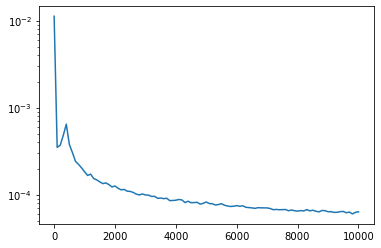

In [11]:
print([np.mean(res) for res in results_sparse_l2])
plt.semilogy(Ns, [np.mean(res) for res in results_sparse_l2])

[0.022162200351170367, 0.02644172145350302, 0.034248633827362714, 0.059503802135370695, 0.06519531026161825, 0.04472710038235299, 0.03885614688095472, 0.035158975564544746, 0.03368160223754062, 0.033036486495407115, 0.031243612046570408, 0.030094446632626132, 0.02826096213115098, 0.02923795707034956, 0.028203104581171097, 0.02806349614946426, 0.027897897653686814, 0.027807721896928872, 0.027301749104199947, 0.026501296902929274, 0.02702414138035462, 0.02678520852294079, 0.026715448954078586, 0.026601213689272197, 0.02609750502237912, 0.02627769162905542, 0.026455727218164075, 0.025275530525116302, 0.025588678539589675, 0.025561480205700298, 0.02532915826930342, 0.02591554500901728, 0.024908541373456244, 0.025130147139670322, 0.02536607496006319, 0.024878883632670774, 0.02472985962770674, 0.02522889157216172, 0.024271723637503552, 0.024856814075396604, 0.02471227325007439, 0.024816136478122537, 0.024595780417518847, 0.024942882372695437, 0.02493967018109532, 0.024165421935068012, 0.0242

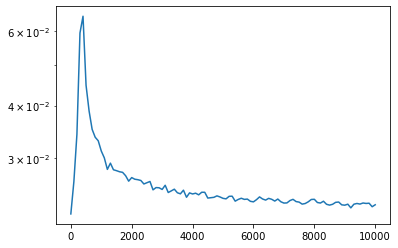

In [12]:
print([np.mean(res) for res in results_dense_wl2])
plt.semilogy(Ns, [np.mean(res) for res in results_dense_wl2])

[0.008167500229288442, 0.00036421788575865556, 0.0003583786664963059, 0.0004139921299906368, 0.0007816088463206954, 0.00046166973361097384, 0.0004158929810527297, 0.00038519488455383377, 0.0003697414567100525, 0.0003642820020916043, 0.0003549022061589054, 0.00036256335156269057, 0.00034375834387010746, 0.00030254997346075216, 0.00031990850590329147, 0.00033614055577420234, 0.00031328570700979886, 0.0003113110538052819, 0.0003167789274735682, 0.0003353442719624557, 0.00029947463738556944, 0.00029080629945164307, 0.00030971712440655574, 0.00031362081234721437, 0.0003195493647438199, 0.0003169851169757948, 0.00032115043485251465, 0.00030055596742343784, 0.00031490732678268236, 0.00032106833057081896, 0.0002920577807026239, 0.00028786554056708865, 0.00028635656369687773, 0.000310185573088828, 0.0003026008106855405, 0.00031409503132897156, 0.0002717345912945451, 0.00028941523348115423, 0.00029330853534223516, 0.0003020425652401887, 0.00028550547004747113, 0.0002976503746443105, 0.0002834549

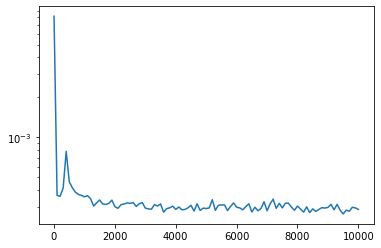

In [13]:
print([np.mean(res) for res in results_sparse_wl2])
plt.semilogy(Ns, [np.mean(res) for res in results_sparse_wl2])

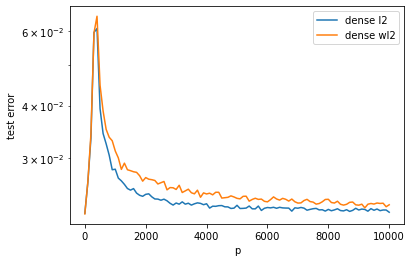

In [14]:
plt.semilogy(Ns, [np.mean(res) for res in results_dense_l2], label="dense l2")
plt.semilogy(Ns, [np.mean(res) for res in results_dense_wl2], label="dense wl2")
plt.xlabel("p")
plt.ylabel("test error")
plt.legend()
plt.show()

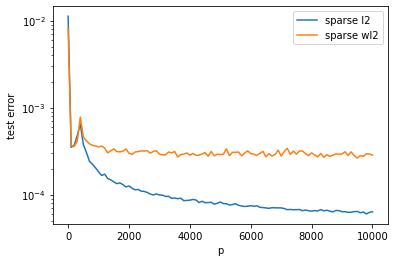

In [15]:
plt.semilogy(Ns, [np.mean(res) for res in results_sparse_l2], label="sparse l2")
plt.semilogy(Ns, [np.mean(res) for res in results_sparse_wl2], label="sparse wl2")
plt.xlabel("p")
plt.ylabel("test error")
plt.legend()
plt.show()

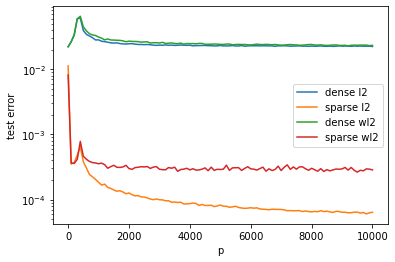

In [16]:
plt.semilogy(Ns, [np.mean(res) for res in results_dense_l2], label="dense l2")
plt.semilogy(Ns, [np.mean(res) for res in results_sparse_l2], label="sparse l2")
plt.semilogy(Ns, [np.mean(res) for res in results_dense_wl2], label="dense wl2")
plt.semilogy(Ns, [np.mean(res) for res in results_sparse_wl2], label="sparse wl2")
plt.xlabel("p")
plt.ylabel("test error")
plt.legend()
plt.show()